Sources : https://analyticsindiamag.com/guide-to-multi-class-classification/

https://colab.research.google.com/drive/19dQTVjbjhKQoqVj0v4x34fNTpc0co5cf?usp=sharing#scrollTo=pZug4ZF56w5e

https://stackoverflow.com/questions/33547965/computing-auc-and-roc-curve-from-multi-class-data-in-scikit-learn-sklearn

https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search

https://towardsdatascience.com/how-to-check-if-a-classification-model-is-overfitted-using-scikit-learn-148b6b19af8b

### Importing the data

2. [Extracting Median and EDA](#Extracting_Median_and_EDA)

3. [Extracting_Minimum](#Extracting_Minimum)

4. [Extracting_Maximum](#Extracting_Maximum)

5. [Extracting_Variance](#Extracting_Variance)

6. [Extracting_std](#Extracting_std)

7. [Extracting_ptp](#Extracting_ptp)

8. [Extracting_iqr](#Extracting_iqr)

10. [Classification_models_for_Cooler_failure](#Classification_models_for_Cooler_failure)

    10a. [Building_a_LR_for_Cooler_Condition](#Building_a_LR_for_Cooler_Condition)
    

Inducing noise : https://stackoverflow.com/questions/46093073/adding-gaussian-noise-to-a-dataset-of-floating-points-and-save-it-python

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
## importing the data
## pressure sensors are imported as PS. There are around 6 pressure sensors. They are named as ps1, ps2, ps3, ps4, ps5, ps6. 

df_ps1 = pd.read_csv('PS1.txt', delimiter = '\t', header = None)
df_ps2 = pd.read_csv('PS2.txt', delimiter = '\t', header = None)
df_ps3 = pd.read_csv('PS3.txt', delimiter = '\t', header = None)
df_ps4 = pd.read_csv('PS4.txt', delimiter = '\t', header = None)
df_ps5 = pd.read_csv('PS5.txt', delimiter = '\t', header = None)
df_ps6 = pd.read_csv('PS6.txt', delimiter = '\t', header = None)


In [3]:
## cooling efficiency and cooling power are imported as ce and cp respectively. 

df_ce = pd.read_csv('CE.txt',delimiter = '\t', header = None)
df_cp = pd.read_csv('CP.txt', delimiter = '\t', header = None)


In [4]:
# temperature sensors are imported as ts. There are around 4 pressure sensors. They are named as ts1, ts2, ts3, ts4.

df_ts1 = pd.read_csv('TS1.txt', delimiter = '\t', header = None)
df_ts2 = pd.read_csv('TS2.txt', delimiter = '\t', header = None)
df_ts3 = pd.read_csv('TS3.txt', delimiter = '\t', header = None)
df_ts4 = pd.read_csv('TS4.txt', delimiter = '\t', header = None)


In [5]:
# flow sensors are imported as fs. There are around 2 pressure sensors. They are named as fs1, fs2.

df_fs1 = pd.read_csv('FS1.txt', delimiter = '\t', header = None)
df_fs2 = pd.read_csv('FS2.txt', delimiter = '\t', header = None)


In [6]:
# motor power sensors is imported as eps. 
# vibration sensors is imported as vs
# efficiency power is imported as se

df_eps1 = pd.read_csv('EPS1.txt', delimiter = '\t', header = None)
df_se = pd.read_csv('SE.txt', delimiter = '\t', header = None)
df_vs1 = pd.read_csv('VS1.txt', delimiter = '\t', header = None)



In [7]:
## function for defining variables like ps1_1, ps1_2 for 17 sensors with different sampling rates

def col(n, var):
    l = []
    for i in range(1,n):
        temp = str(var) + '_' + '%d' %i
        l.append(temp)
    return l


In [8]:
# 
df_ps1.columns = col(6001,'ps1')
df_ps2.columns = col(6001,'ps2')
df_ps3.columns = col(6001,'ps3')
df_ps4.columns = col(6001,'ps4')
df_ps5.columns = col(6001,'ps5')
df_ps6.columns = col(6001,'ps6')




In [9]:
df_ts1.columns = col(61,'ts1')
df_ts2.columns = col(61,'ts2')
df_ts3.columns = col(61,'ts3')
df_ts4.columns = col(61,'ts4')


In [10]:
df_eps1.columns = col(6001,'eps1')

In [11]:
df_fs1.columns = col(601,'fs1')
df_fs2.columns = col(601,'fs2')

In [12]:
df_vs1.columns = col(61,'vs1')

In [13]:
df_ce.columns = col(61,'ce')

In [14]:
df_cp.columns = col(61,'cp')

In [15]:
df_se.columns = col(61,'se')

In [16]:
df_ps = pd.concat([df_ps1, df_ps2, df_ps3, df_ps4, df_ps5, df_ps6], axis = 1)
df_ts = pd.concat([df_ts1, df_ts2, df_ts3, df_ts4], axis = 1)
df_fs = pd.concat([df_fs1, df_fs2], axis = 1)
df_vir = pd.concat([df_cp, df_ce, df_eps1, df_se, df_vs1], axis = 1)


In [17]:
df = pd.concat([df_ps, df_ts, df_fs, df_vir], axis = 1)
df.head()

,ps1_1,ps1_2,ps1_3,ps1_4,ps1_5,ps1_6,ps1_7,ps1_8,ps1_9,ps1_10,...,vs1_51,vs1_52,vs1_53,vs1_54,vs1_55,vs1_56,vs1_57,vs1_58,vs1_59,vs1_60
0,151.47,151.45,151.52,151.27,150.80,150.69,153.89,154.67,152.88,153.82,...,0.554,0.552,0.545,0.553,0.553,0.539,0.544,0.545,0.535,0.543
1,151.11,151.12,151.16,150.92,150.70,150.62,152.40,153.21,152.81,153.53,...,0.555,0.547,0.548,0.544,0.536,0.542,0.540,0.533,0.531,0.534
2,150.81,150.79,150.84,150.65,150.35,150.23,152.03,152.81,152.44,153.27,...,0.543,0.544,0.543,0.554,0.544,0.544,0.545,0.544,0.530,0.534
3,150.48,150.47,150.52,150.31,150.04,149.98,151.63,152.48,152.24,152.94,...,0.549,0.538,0.553,0.543,0.553,0.555,0.544,0.543,0.543,0.542
4,150.41,150.35,150.24,150.12,149.87,149.71,151.64,152.37,151.78,152.68,...,0.546,0.546,0.544,0.552,0.539,0.540,0.549,0.542,0.533,0.537


#### Checking for clustering tendency in each Sensor
#### Ideas for feature extraction and dimensionality reduction

1. **Rolling window of size 60 and follow it with statistical measures**  
2. **Use Python frameworks like tfresh and TSFEL**
3. Make clusters using k-means and SVM 
4. **Rolling window of size 60 and follow it with PCA. Use this article for reference : https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/**


In [18]:
profile = pd.read_csv('profile.txt', delimiter = '\t', header = None)
profile.columns = ["Cooler Condition","Valve Condition","Internal Pump Leakage","Hydraulic Accumulator","Stable Flag"]

In [19]:
Final = pd.concat([df, profile], axis = 1)
Final['Cycle'] = np.arange(len(Final))
Final.head()

,ps1_1,ps1_2,ps1_3,ps1_4,ps1_5,ps1_6,ps1_7,ps1_8,ps1_9,ps1_10,...,vs1_57,vs1_58,vs1_59,vs1_60,Cooler Condition,Valve Condition,Internal Pump Leakage,Hydraulic Accumulator,Stable Flag,Cycle
0,151.47,151.45,151.52,151.27,150.80,150.69,153.89,154.67,152.88,153.82,...,0.544,0.545,0.535,0.543,3,100,0,130,1,0
1,151.11,151.12,151.16,150.92,150.70,150.62,152.40,153.21,152.81,153.53,...,0.540,0.533,0.531,0.534,3,100,0,130,1,1
2,150.81,150.79,150.84,150.65,150.35,150.23,152.03,152.81,152.44,153.27,...,0.545,0.544,0.530,0.534,3,100,0,130,1,2
3,150.48,150.47,150.52,150.31,150.04,149.98,151.63,152.48,152.24,152.94,...,0.544,0.543,0.543,0.542,3,100,0,130,1,3
4,150.41,150.35,150.24,150.12,149.87,149.71,151.64,152.37,151.78,152.68,...,0.549,0.542,0.533,0.537,3,100,0,130,1,4


# Statistical features

<a id = 'Extracting_Median_and_EDA'></a>

## Extracting Median

In [20]:
def median_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.median(axis=1) ## AVERAGE ALONG THE ROW
    return df1

In [21]:
PS1_median = pd.DataFrame(median_conversion(df_ps1))
PS1_median.columns = ['PS1_median']

PS2_median = pd.DataFrame(median_conversion(df_ps2))
PS2_median.columns = ['PS2_median']

PS3_median = pd.DataFrame(median_conversion(df_ps3))
PS3_median.columns = ['PS3_median']

PS4_median = pd.DataFrame(median_conversion(df_ps4))
PS4_median.columns = ['PS4_median']

PS5_median = pd.DataFrame(median_conversion(df_ps5))
PS5_median.columns = ['PS5_median']

PS6_median = pd.DataFrame(median_conversion(df_ps6))
PS6_median.columns = ['PS6_median']

TS1_median = pd.DataFrame(median_conversion(df_ts1))
TS1_median.columns = ['TS1_median']

TS2_median = pd.DataFrame(median_conversion(df_ts2))
TS2_median.columns = ['TS2_median']

TS3_median = pd.DataFrame(median_conversion(df_ts3))
TS3_median.columns = ['TS3_median']

TS4_median = pd.DataFrame(median_conversion(df_ts4))
TS4_median.columns = ['TS4_median']

FS1_median = pd.DataFrame(median_conversion(df_fs1))
FS1_median.columns = ['FS1_median']

FS2_median = pd.DataFrame(median_conversion(df_fs2))
FS2_median.columns = ['FS2_median']

P1_median = pd.DataFrame(median_conversion(df_eps1))
P1_median.columns = ['P1_median']

VS1_median = pd.DataFrame(median_conversion(df_vs1))
VS1_median.columns = ['VS1_median']

CE1_median = pd.DataFrame(median_conversion(df_ce))
CE1_median.columns = ['CE1_median']

CP1_median = pd.DataFrame(median_conversion(df_cp))
CP1_median.columns = ['CP1_median']

SE1_median = pd.DataFrame(median_conversion(df_se))
SE1_median.columns = ['SE1_median']

In [22]:
Median = pd.concat([PS1_median,PS2_median,PS3_median,PS4_median,PS5_median,PS6_median,
                    TS1_median,TS2_median,TS3_median,TS4_median,FS1_median,FS2_median,
                    P1_median,VS1_median,CE1_median,CP1_median,SE1_median],axis = 1)

<a id = 'Extracting_Variance'></a>

## Extracting Variance

In [23]:
def var_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.var(axis=1) ## AVERAGE ALONG THE ROW
    return df1

In [24]:
PS1_var = pd.DataFrame(var_conversion(df_ps1))
PS1_var.columns = ['PS1_var']

PS2_var = pd.DataFrame(var_conversion(df_ps2))
PS2_var.columns = ['PS2_var']

PS3_var = pd.DataFrame(var_conversion(df_ps3))
PS3_var.columns = ['PS3_var']

PS4_var = pd.DataFrame(var_conversion(df_ps4))
PS4_var.columns = ['PS4_var']

PS5_var = pd.DataFrame(var_conversion(df_ps5))
PS5_var.columns = ['PS5_var']

PS6_var = pd.DataFrame(var_conversion(df_ps6))
PS6_var.columns = ['PS6_var']

TS1_var = pd.DataFrame(var_conversion(df_ts1))
TS1_var.columns = ['TS1_var']

TS2_var = pd.DataFrame(var_conversion(df_ts2))
TS2_var.columns = ['TS2_var']

TS3_var = pd.DataFrame(var_conversion(df_ts3))
TS3_var.columns = ['TS3_var']

TS4_var = pd.DataFrame(var_conversion(df_ts4))
TS4_var.columns = ['TS4_var']

FS1_var = pd.DataFrame(var_conversion(df_fs1))
FS1_var.columns = ['FS1_var']

FS2_var = pd.DataFrame(var_conversion(df_fs2))
FS2_var.columns = ['FS2_var']

P1_var = pd.DataFrame(var_conversion(df_eps1))
P1_var.columns = ['P1_var']

VS1_var = pd.DataFrame(var_conversion(df_vs1))
VS1_var.columns = ['VS1_var']

CE1_var = pd.DataFrame(var_conversion(df_ce))
CE1_var.columns = ['CE1_var']

CP1_var = pd.DataFrame(var_conversion(df_cp))
CP1_var.columns = ['CP1_var']

SE1_var = pd.DataFrame(var_conversion(df_se))
SE1_var.columns = ['SE1_var']

Var = pd.concat([PS1_var,PS2_var,PS3_var,PS4_var,PS5_var,PS6_var,
                 TS1_var,TS2_var,TS3_var,TS4_var,FS1_var,FS2_var,P1_var,VS1_var,CE1_var,CP1_var,SE1_var],axis = 1)


<a id = 'Extracting_std'></a>

## Extracting Standard Deviation

In [25]:
def std_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.std(axis=1) ## AVERAGE ALONG THE ROW
    return df1

In [26]:
PS1_std = pd.DataFrame(std_conversion(df_ps1))
PS1_std.columns = ['PS1_std']

PS2_std = pd.DataFrame(std_conversion(df_ps2))
PS2_std.columns = ['PS2_std']

PS3_std = pd.DataFrame(std_conversion(df_ps3))
PS3_std.columns = ['PS3_std']

PS4_std = pd.DataFrame(std_conversion(df_ps4))
PS4_std.columns = ['PS4_std']

PS5_std = pd.DataFrame(std_conversion(df_ps5))
PS5_std.columns = ['PS5_std']

PS6_std = pd.DataFrame(std_conversion(df_ps6))
PS6_std.columns = ['PS6_std']

TS1_std = pd.DataFrame(std_conversion(df_ts1))
TS1_std.columns = ['TS1_std']

TS2_std = pd.DataFrame(std_conversion(df_ts2))
TS2_std.columns = ['TS2_std']

TS3_std = pd.DataFrame(std_conversion(df_ts3))
TS3_std.columns = ['TS3_std']

TS4_std = pd.DataFrame(std_conversion(df_ts4))
TS4_std.columns = ['TS4_std']

FS1_std = pd.DataFrame(std_conversion(df_fs1))
FS1_std.columns = ['FS1_std']

FS2_std = pd.DataFrame(std_conversion(df_fs2))
FS2_std.columns = ['FS2_std']

P1_std = pd.DataFrame(std_conversion(df_eps1))
P1_std.columns = ['P1_std']

VS1_std = pd.DataFrame(std_conversion(df_vs1))
VS1_std.columns = ['VS1_std']

CE1_std = pd.DataFrame(std_conversion(df_ce))
CE1_std.columns = ['CE1_std']

CP1_std = pd.DataFrame(std_conversion(df_cp))
CP1_std.columns = ['CP1_std']

SE1_std = pd.DataFrame(std_conversion(df_se))
SE1_std.columns = ['SE1_std']

Std = pd.concat([PS1_std,PS2_std,PS3_std,PS4_std,PS5_std,PS6_std,TS1_std,TS2_std,TS3_std,TS4_std,
                 FS1_std,FS2_std,P1_std,VS1_std,CE1_std,CP1_std,SE1_std],axis = 1)


<a id = 'Extracting_ptp'></a>

## Extracting Peak to Peak

In [27]:
def ptp_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.max(axis=1)-df.min(axis=1) ## AVERAGE ALONG THE ROW
    return df1

In [28]:
PS1_ptp = pd.DataFrame(ptp_conversion(df_ps1))
PS1_ptp.columns = ['PS1_ptp']

PS2_ptp = pd.DataFrame(ptp_conversion(df_ps2))
PS2_ptp.columns = ['PS2_ptp']

PS3_ptp = pd.DataFrame(ptp_conversion(df_ps3))
PS3_ptp.columns = ['PS3_ptp']

PS4_ptp = pd.DataFrame(ptp_conversion(df_ps4))
PS4_ptp.columns = ['PS4_ptp']

PS5_ptp = pd.DataFrame(ptp_conversion(df_ps5))
PS5_ptp.columns = ['PS5_ptp']

PS6_ptp = pd.DataFrame(ptp_conversion(df_ps6))
PS6_ptp.columns = ['PS6_ptp']

TS1_ptp = pd.DataFrame(ptp_conversion(df_ts1))
TS1_ptp.columns = ['TS1_ptp']

TS2_ptp = pd.DataFrame(ptp_conversion(df_ts2))
TS2_ptp.columns = ['TS2_ptp']

TS3_ptp = pd.DataFrame(ptp_conversion(df_ts3))
TS3_ptp.columns = ['TS3_ptp']

TS4_ptp = pd.DataFrame(ptp_conversion(df_ts4))
TS4_ptp.columns = ['TS4_ptp']

FS1_ptp = pd.DataFrame(ptp_conversion(df_fs1))
FS1_ptp.columns = ['FS1_ptp']

FS2_ptp = pd.DataFrame(ptp_conversion(df_fs2))
FS2_ptp.columns = ['FS2_ptp']

P1_ptp = pd.DataFrame(ptp_conversion(df_eps1))
P1_ptp.columns = ['P1_ptp']

VS1_ptp = pd.DataFrame(ptp_conversion(df_vs1))
VS1_ptp.columns = ['VS1_ptp']

CE1_ptp = pd.DataFrame(ptp_conversion(df_ce))
CE1_ptp.columns = ['CE1_ptp']

CP1_ptp = pd.DataFrame(ptp_conversion(df_cp))
CP1_ptp.columns = ['CP1_ptp']

SE1_ptp = pd.DataFrame(ptp_conversion(df_se))
SE1_ptp.columns = ['SE1_ptp']

Ptp = pd.concat([PS1_ptp,PS2_ptp,PS3_ptp,PS4_ptp,PS5_ptp,PS6_ptp,TS1_ptp,TS2_ptp,TS3_ptp,TS4_ptp,
                 FS1_ptp,FS2_ptp,P1_ptp,VS1_ptp,CE1_ptp,CP1_ptp,SE1_ptp],axis = 1)


In [29]:
statsfinal = pd.concat([Median, Std, Var, Ptp], axis = 1)

In [30]:
statsfinal.head()

,PS1_median,PS2_median,PS3_median,PS4_median,PS5_median,PS6_median,TS1_median,TS2_median,TS3_median,TS4_median,...,TS2_ptp,TS3_ptp,TS4_ptp,FS1_ptp,FS2_ptp,P1_ptp,VS1_ptp,CE1_ptp,CP1_ptp,SE1_ptp
0,156.25,129.365,2.297,0.0,9.844,9.733,35.5720,40.9630,38.4960,31.576,...,0.477,0.297,3.231,18.710,0.298,611.8,0.092,18.572,0.805,79.568
1,156.06,129.385,2.273,0.0,9.632,9.526,36.7675,41.5180,38.9845,34.553,...,1.074,0.586,1.500,18.712,0.101,615.4,0.102,5.888,0.267,80.441
2,155.72,129.325,2.273,0.0,9.528,9.425,38.0235,42.4235,39.6270,35.635,...,1.207,0.828,1.043,18.698,0.147,621.2,0.133,2.334,0.083,80.824
3,155.56,128.865,2.242,0.0,9.436,9.335,39.0550,43.3650,40.3420,36.635,...,1.183,0.911,0.883,18.896,0.141,618.8,0.118,1.892,0.085,80.930
4,155.34,129.000,2.219,0.0,9.358,9.260,39.9670,44.3355,41.3400,37.439,...,1.145,0.918,0.789,18.876,0.133,622.0,0.136,1.327,0.090,81.100


<a id = 'Extracting_iqr'></a>

## Extracting Interquartile Range

In [31]:
def iqr_conversion(df):
    df1 = pd.DataFrame()
    q3, q1 = np.percentile(df, [75 ,25])
    iqr = q3 - q1
    df1 = df.max(axis=1)-df.min(axis=1) ## AVERAGE ALONG THE ROW
    return df1

In [32]:
PS1_iqr = pd.DataFrame(iqr_conversion(df_ps1))
PS1_iqr.columns = ['PS1_iqr']

PS2_iqr = pd.DataFrame(iqr_conversion(df_ps2))
PS2_iqr.columns = ['PS2_iqr']

PS3_iqr = pd.DataFrame(iqr_conversion(df_ps3))
PS3_iqr.columns = ['PS3_iqr']

PS4_iqr = pd.DataFrame(iqr_conversion(df_ps4))
PS4_iqr.columns = ['PS4_iqr']

PS5_iqr = pd.DataFrame(iqr_conversion(df_ps5))
PS5_iqr.columns = ['PS5_iqr']

PS6_iqr = pd.DataFrame(iqr_conversion(df_ps6))
PS6_iqr.columns = ['PS6_iqr']

TS1_iqr = pd.DataFrame(iqr_conversion(df_ts1))
TS1_iqr.columns = ['TS1_iqr']

TS2_iqr = pd.DataFrame(iqr_conversion(df_ts2))
TS2_iqr.columns = ['TS2_iqr']

TS3_iqr = pd.DataFrame(iqr_conversion(df_ts3))
TS3_iqr.columns = ['TS3_iqr']

TS4_iqr = pd.DataFrame(iqr_conversion(df_ts4))
TS4_iqr.columns = ['TS4_iqr']

FS1_iqr = pd.DataFrame(iqr_conversion(df_fs1))
FS1_iqr.columns = ['FS1_iqr']

FS2_iqr = pd.DataFrame(iqr_conversion(df_fs2))
FS2_iqr.columns = ['FS2_iqr']

P1_iqr = pd.DataFrame(iqr_conversion(df_eps1))
P1_iqr.columns = ['P1_iqr']

VS1_iqr = pd.DataFrame(iqr_conversion(df_vs1))
VS1_iqr.columns = ['VS1_iqr']

CE1_iqr = pd.DataFrame(iqr_conversion(df_ce))
CE1_iqr.columns = ['CE1_iqr']

CP1_iqr = pd.DataFrame(iqr_conversion(df_cp))
CP1_iqr.columns = ['CP1_iqr']

SE1_iqr = pd.DataFrame(iqr_conversion(df_se))
SE1_iqr.columns = ['SE1_iqr']

Iqr = pd.concat([PS1_iqr,PS2_iqr,PS3_iqr,PS4_iqr,PS5_iqr,PS6_iqr,
                 TS1_iqr,TS2_iqr,TS3_iqr,TS4_iqr,FS1_iqr,FS2_iqr,P1_iqr,VS1_iqr,CE1_iqr,CP1_iqr,SE1_iqr],axis = 1)


In [33]:
statsfinal = pd.concat([statsfinal, Iqr],axis = 1)

In [34]:
statsfinal.head()

,PS1_median,PS2_median,PS3_median,PS4_median,PS5_median,PS6_median,TS1_median,TS2_median,TS3_median,TS4_median,...,TS2_iqr,TS3_iqr,TS4_iqr,FS1_iqr,FS2_iqr,P1_iqr,VS1_iqr,CE1_iqr,CP1_iqr,SE1_iqr
0,156.25,129.365,2.297,0.0,9.844,9.733,35.5720,40.9630,38.4960,31.576,...,0.477,0.297,3.231,18.710,0.298,611.8,0.092,18.572,0.805,79.568
1,156.06,129.385,2.273,0.0,9.632,9.526,36.7675,41.5180,38.9845,34.553,...,1.074,0.586,1.500,18.712,0.101,615.4,0.102,5.888,0.267,80.441
2,155.72,129.325,2.273,0.0,9.528,9.425,38.0235,42.4235,39.6270,35.635,...,1.207,0.828,1.043,18.698,0.147,621.2,0.133,2.334,0.083,80.824
3,155.56,128.865,2.242,0.0,9.436,9.335,39.0550,43.3650,40.3420,36.635,...,1.183,0.911,0.883,18.896,0.141,618.8,0.118,1.892,0.085,80.930
4,155.34,129.000,2.219,0.0,9.358,9.260,39.9670,44.3355,41.3400,37.439,...,1.145,0.918,0.789,18.876,0.133,622.0,0.136,1.327,0.090,81.100


In [35]:
statsfinal_target = pd.concat([statsfinal,profile], axis = 1)

In [36]:
statsfinal.head()

,PS1_median,PS2_median,PS3_median,PS4_median,PS5_median,PS6_median,TS1_median,TS2_median,TS3_median,TS4_median,...,TS2_iqr,TS3_iqr,TS4_iqr,FS1_iqr,FS2_iqr,P1_iqr,VS1_iqr,CE1_iqr,CP1_iqr,SE1_iqr
0,156.25,129.365,2.297,0.0,9.844,9.733,35.5720,40.9630,38.4960,31.576,...,0.477,0.297,3.231,18.710,0.298,611.8,0.092,18.572,0.805,79.568
1,156.06,129.385,2.273,0.0,9.632,9.526,36.7675,41.5180,38.9845,34.553,...,1.074,0.586,1.500,18.712,0.101,615.4,0.102,5.888,0.267,80.441
2,155.72,129.325,2.273,0.0,9.528,9.425,38.0235,42.4235,39.6270,35.635,...,1.207,0.828,1.043,18.698,0.147,621.2,0.133,2.334,0.083,80.824
3,155.56,128.865,2.242,0.0,9.436,9.335,39.0550,43.3650,40.3420,36.635,...,1.183,0.911,0.883,18.896,0.141,618.8,0.118,1.892,0.085,80.930
4,155.34,129.000,2.219,0.0,9.358,9.260,39.9670,44.3355,41.3400,37.439,...,1.145,0.918,0.789,18.876,0.133,622.0,0.136,1.327,0.090,81.100


In [37]:
profile_pump = profile['Internal Pump Leakage']

<a id = 'Classification_models_for_Pump_failure'></a>

# Classification of Pump condition

### Train -Test split

In [38]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(statsfinal, profile_pump, train_size=0.7, test_size=0.3, random_state=100, stratify = profile_pump )

### Balance the classes using SMOTE

In [39]:

## SMOTE method is used to balance data
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=45, k_neighbors=5)
X_train, y_train = smt.fit_sample(X_train,y_train)
X_train = pd.DataFrame(X_train, columns=X_train.columns)

#y_train_smt = pd.DataFrame(y_train_smt)

X_train.head()

,PS1_median,PS2_median,PS3_median,PS4_median,PS5_median,PS6_median,TS1_median,TS2_median,TS3_median,TS4_median,...,TS2_iqr,TS3_iqr,TS4_iqr,FS1_iqr,FS2_iqr,P1_iqr,VS1_iqr,CE1_iqr,CP1_iqr,SE1_iqr
0,155.92,129.685,2.250,10.1050,9.870,9.752,36.008,41.5720,38.834,30.9750,...,0.242,0.281,0.133,20.101,0.101,609.2,0.094,1.457,0.100,77.190
1,152.91,127.120,1.969,0.0000,9.035,8.960,46.047,50.8615,48.195,41.5940,...,0.285,0.340,0.055,20.106,0.097,643.8,0.105,1.003,0.094,77.244
2,188.45,132.510,0.797,0.0000,8.477,8.425,56.023,59.9450,57.437,51.0120,...,0.617,0.250,0.281,20.479,0.142,649.8,0.152,1.468,0.126,92.360
3,156.42,130.070,2.320,0.3715,9.962,9.843,35.488,41.0700,38.359,30.4880,...,0.230,0.203,0.133,19.141,0.111,609.6,0.090,1.181,0.084,77.120
4,188.40,132.645,0.820,0.0000,8.436,8.388,56.414,59.8965,58.031,51.6915,...,0.586,0.207,0.559,20.479,0.127,653.6,0.168,1.807,0.144,90.284


### Standardisation of Data

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() ## x-mean/std

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [42]:
X_train_scaled.columns = statsfinal.columns 
X_test_scaled.columns = statsfinal.columns 

In [43]:
print(X_test_scaled.shape)
print(X_train_scaled.shape)

(662, 85)
(2565, 85)


In [44]:
SFy_traindf = pd.DataFrame(y_train)
SFy_testdf = pd.DataFrame(y_test)

print(y_train.value_counts())
print(y_test.value_counts())


1    855
2    855
0    855
Name: Internal Pump Leakage, dtype: int64
0    366
2    148
1    148
Name: Internal Pump Leakage, dtype: int64


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV
from tpot import TPOTClassifier
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

C:\Users\Admin\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [46]:
def evaluate_model(dt_classifier,y_train,X_train,y_test,X_test):
    print("Train Precision :", (precision_score(y_train, dt_classifier.predict(X_train)))*100)
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Precision :", (precision_score(y_test, dt_classifier.predict(X_test)))*100)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

<a id = 'SVM_for_Valve_failure_classification.'></a>

### SVM for Pump failure classification

## PCA

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(random_state=42)
X_train_pca = pca.fit(X_train_scaled)

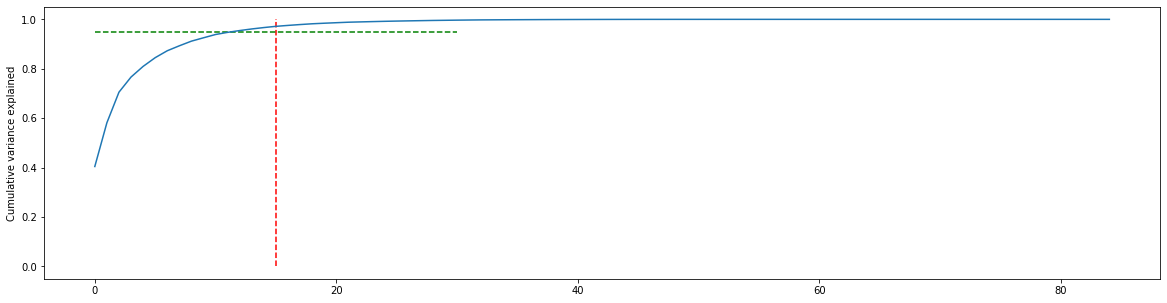

In [49]:
import matplotlib.pyplot as plt

var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[20,5])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [50]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=17)

X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)


In [51]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(2565, 17)
(662, 17)


In [52]:
from sklearn.metrics import roc_curve, auc

In [53]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_pca, y_train)
svm_predictions = svm_model_linear.predict(X_test_pca)

In [54]:
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[336,  29,   1],
       [ 12, 103,  33],
       [  4,  21, 123]], dtype=int64)

In [55]:
def cmatrix(model):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrix')
    disp = metrics.plot_confusion_matrix(model, X_test_pca,y_test,display_labels= ['No leakage','Weak leakage','Severe Leakage'],   ax = ax)
    return disp.confusion_matrix
    

array([[336,  29,   1],
       [ 12, 103,  33],
       [  4,  21, 123]], dtype=int64)

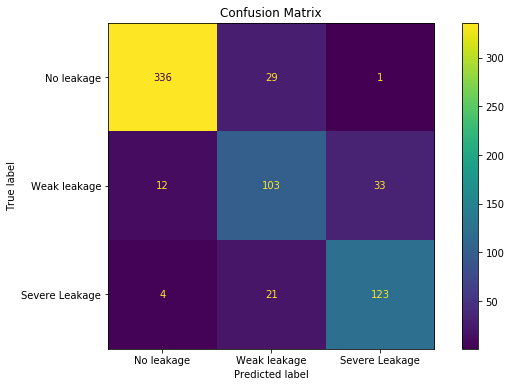

In [56]:
cmatrix(svm_model_linear)

In [57]:
print(metrics.classification_report(y_test, svm_model_linear.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       366
           1       0.67      0.70      0.68       148
           2       0.78      0.83      0.81       148

    accuracy                           0.85       662
   macro avg       0.80      0.82      0.81       662
weighted avg       0.85      0.85      0.85       662



In [58]:
y_score_svm = svm_model_linear.fit(X_train_pca, y_train).decision_function(X_test_pca)
y_score_svm

array([[-0.26078496,  2.24110721,  1.16501126],
       [ 2.2723152 ,  1.16574399, -0.28166853],
       [ 2.30893509,  1.14116101, -0.31017995],
       ...,
       [ 2.20226376,  1.20745653, -0.25380295],
       [-0.26585686,  2.26078835,  1.08552818],
       [-0.27845667,  1.25361933,  2.2180972 ]])

In [59]:
def plot_multiclass_roc(y_score, X_test, y_test, n_classes= 3, figsize = (20,6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

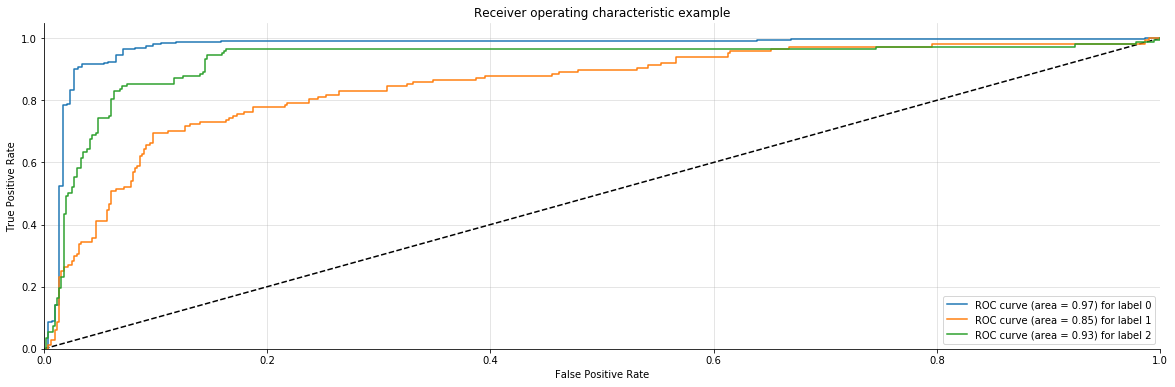

In [60]:
plot_multiclass_roc(y_score_svm,X_test_pca, y_test, 3)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svm_model_linear.predict(X_test_scaled)))

<a id = 'kNN_for_cooler_failure_classification.'></a>

### kNN for cooler failure classification

In [61]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_pca, y_train)


array([[322,  40,   4],
       [  7, 102,  39],
       [  3,  35, 110]], dtype=int64)

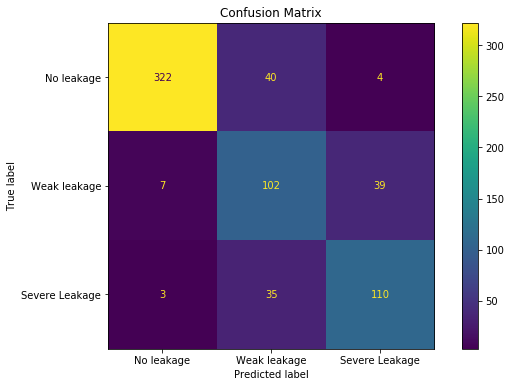

In [62]:
cmatrix(knn)

In [63]:
y_score_knn = knn.fit(X_train_pca, y_train).predict_proba(X_test_pca)
y_score_knn

array([[0.        , 0.57142857, 0.42857143],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       ...,
       [0.42857143, 0.57142857, 0.        ],
       [0.        , 0.57142857, 0.42857143],
       [0.        , 0.28571429, 0.71428571]])

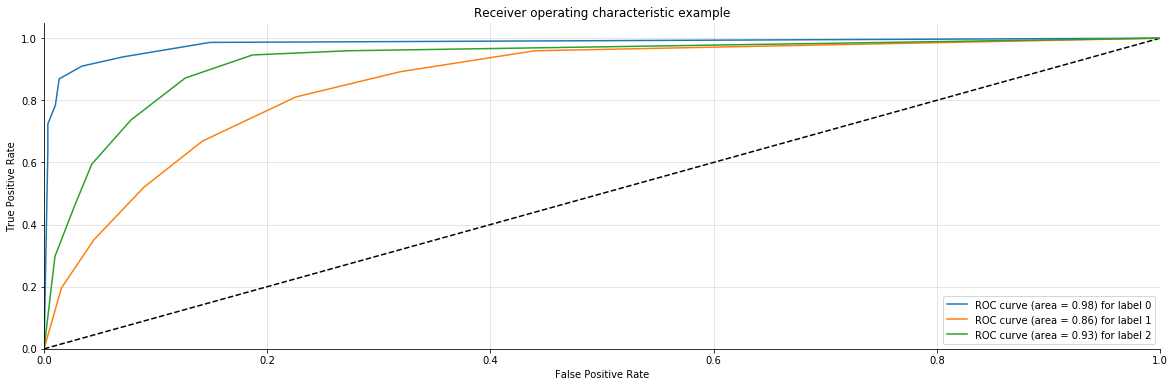

In [64]:
plot_multiclass_roc(y_score_knn, X_test_pca, y_test, n_classes=3, figsize=(20, 6))

In [66]:
print(metrics.classification_report(y_test, knn.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       366
           1       0.58      0.69      0.63       148
           2       0.72      0.74      0.73       148

    accuracy                           0.81       662
   macro avg       0.76      0.77      0.76       662
weighted avg       0.83      0.81      0.81       662



<a id = 'RF_for_cooler_failure_classification.'></a>

### RF for cooler failure classification

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Fitting Random Forest Classification to the Training set

classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [69]:
def cmatrixrf(model):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrix')
    disp = metrics.plot_confusion_matrix(model, X_test_scaled,y_test,display_labels= ['No leakage','Weak leakage','Severe Leakage'],   ax = ax)
    return disp.confusion_matrix
    

array([[366,   0,   0],
       [  0, 145,   3],
       [  0,   1, 147]], dtype=int64)

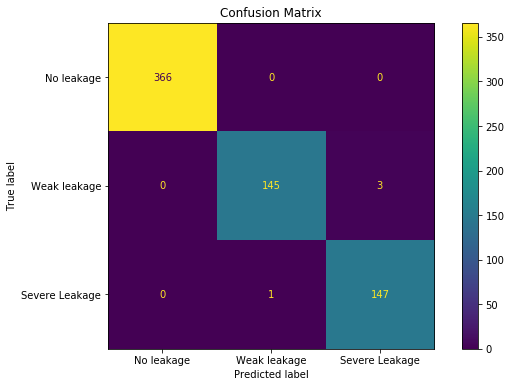

In [70]:
cmatrixrf(classifier_rf)

In [71]:
y_score_rf = classifier_rf.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
y_score_rf

array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       ...,
       [0.9, 0.1, 0. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ]])

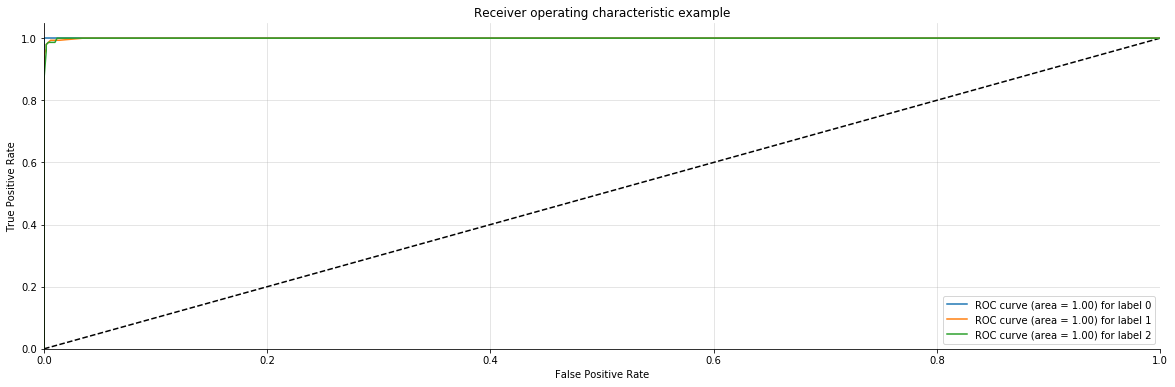

In [72]:
plot_multiclass_roc(y_score_rf, X_test_scaled, y_test, n_classes=3, figsize=(20, 6))

In [74]:
print(metrics.classification_report(y_test, classifier_rf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       0.99      0.98      0.99       148
           2       0.98      0.99      0.99       148

    accuracy                           0.99       662
   macro avg       0.99      0.99      0.99       662
weighted avg       0.99      0.99      0.99       662



### NOISE

In [75]:
import numpy as np 
mu, sigma = 0, np.std(X_test_scaled)*0.20
noise = np.random.normal(mu, sigma, X_test_scaled.shape)

X_testnoise = X_test_scaled + noise

In [78]:
import numpy as np 
mu, sigma = 0, np.std(X_test_pca)*0.20
noise = np.random.normal(mu, sigma, X_test_pca.shape)

X_testpcanoise = X_test_pca + noise

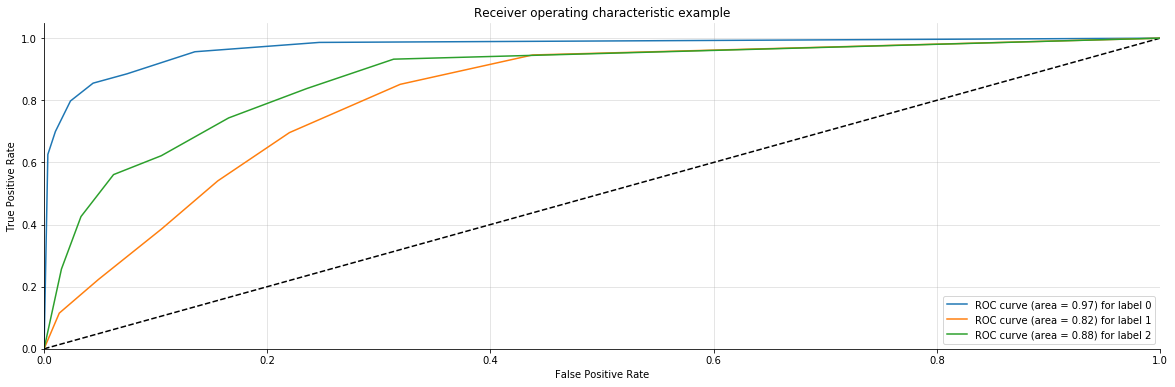

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       366
           1       0.49      0.57      0.53       148
           2       0.61      0.64      0.62       148

    accuracy                           0.75       662
   macro avg       0.68      0.69      0.68       662
weighted avg       0.77      0.75      0.75       662



In [82]:
y_score_knnnoise = knn.fit(X_train_pca, y_train).predict_proba(X_testpcanoise)
y_score_knnnoise

plot_multiclass_roc(y_score_knnnoise, X_testpcanoise, y_test, n_classes=3, figsize=(20, 6))


print(metrics.classification_report(y_test, knn.predict(X_testpcanoise)))

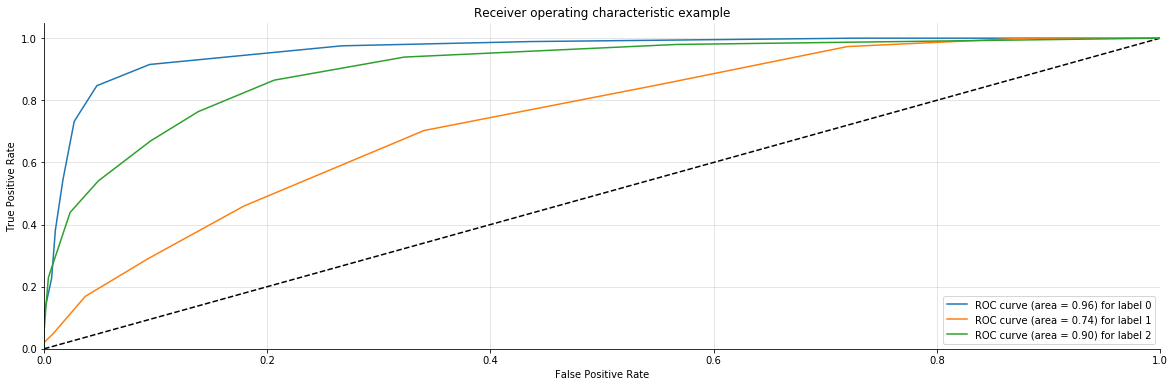

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       366
           1       0.49      0.57      0.53       148
           2       0.67      0.68      0.68       148

    accuracy                           0.76       662
   macro avg       0.70      0.71      0.70       662
weighted avg       0.78      0.76      0.77       662



In [77]:
y_score_rfnoise = classifier_rf.fit(X_train_scaled, y_train).predict_proba(X_testnoise)
y_score_rfnoise

plot_multiclass_roc(y_score_rfnoise, X_testnoise, y_test, n_classes=3, figsize=(20, 6))


print(metrics.classification_report(y_test, classifier_rf.predict(X_testnoise)))

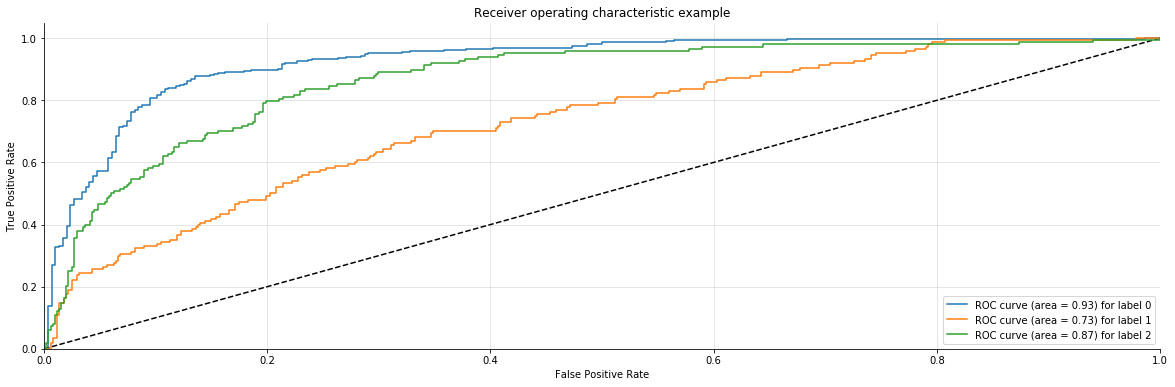

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       366
           1       0.44      0.43      0.44       148
           2       0.58      0.67      0.62       148

    accuracy                           0.71       662
   macro avg       0.64      0.65      0.64       662
weighted avg       0.72      0.71      0.72       662



In [83]:
y_score_svmnoise = svm_model_linear.fit(X_train_pca, y_train).decision_function(X_testpcanoise)
y_score_svmnoise

plot_multiclass_roc(y_score_svmnoise, X_testpcanoise, y_test, n_classes=3, figsize=(20, 6))


print(metrics.classification_report(y_test, svm_model_linear.predict(X_testpcanoise)))